이제 배운 것을 활용하여 한국은행 openapi의 통계에 접근해 보자. get 메서드로 https://ecos.bok.or.kr/api/StatisticSearch/sample/json/kr/1/10/200Y001/A/2015/2021/10101/?/?/? 에 접속한다.

In [34]:
import requests as rq
gdp = rq.get('https://ecos.bok.or.kr/api/StatisticSearch/XYPOYKDP47WYCIRCVWP6/json/kr/1/10/200Y001/A/2012/2021/10101/?/?/?')
print('Response Code', gdp.status_code)
key = 'XYPOYKDP47WYCIRCVWP6'

Response Code 200


In [32]:
import json
gdp = gdp.json()
print(gdp['StatisticSearch']['row'][0])

{'STAT_CODE': '200Y001', 'STAT_NAME': '2.1.1.1. 주요지표(연간지표)', 'ITEM_CODE1': '10101', 'ITEM_NAME1': '국내총생산(명목, 원화표시)', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '십억원 ', 'TIME': '2012', 'DATA_VALUE': '1440111.4'}


예시로 지난 10년간의 국내총생산을 받아 보았다. 이제 데이터프레임에 넣어주면

In [26]:
import pandas as pd

df = pd.DataFrame(gdp)
print(df)

                                                    StatisticSearch
list_total_count                                                 10
row               [{'STAT_CODE': '200Y001', 'STAT_NAME': '2.1.1....


xml의 경우 xmltodict.parse() 를 통해 dict으로 언팩할 수 있다. 

In [35]:
dicturl = f'https://ecos.bok.or.kr/api/StatisticWord/{key}/json/kr/1/10/'
dictionary = rq.get(dicturl)
dictionary = dictionary.json()

In [36]:
print(dictionary)

{'RESULT': {'CODE': 'ERROR-100', 'MESSAGE': '필수 값이 누락되어 있습니다. 필수 값을 확인하십시오!\n 필수 값이 누락되어 있으면 오류를 발생합니다. 요청 변수를 참고 하십시오!'}}


In [55]:
stock_key = '901Y055'
key_stats_url = 'https://ecos.bok.or.kr/api/KeyStatisticList/XYPOYKDP47WYCIRCVWP6/json/kr/1/100'

key_stats = rq.get(key_stats_url)
print(key_stats.status_code)
key_stats_dict = key_stats.json()

print(key_stats_dict)

200
{'KeyStatisticList': {'list_total_count': 100, 'row_count': 100, 'row': [{'CLASS_NAME': '시장금리', 'KEYSTAT_NAME': '한국은행 기준금리', 'DATA_VALUE': '3.5', 'CYCLE': '20230225', 'UNIT_NAME': '% '}, {'CLASS_NAME': '시장금리', 'KEYSTAT_NAME': '콜금리(익일물)', 'DATA_VALUE': '3.428', 'CYCLE': '20230227', 'UNIT_NAME': '% '}, {'CLASS_NAME': '시장금리', 'KEYSTAT_NAME': 'KORIBOR(3개월)', 'DATA_VALUE': '3.63', 'CYCLE': '20230227', 'UNIT_NAME': '% '}, {'CLASS_NAME': '시장금리', 'KEYSTAT_NAME': 'CD수익률(91일)', 'DATA_VALUE': '3.59', 'CYCLE': '20230227', 'UNIT_NAME': '% '}, {'CLASS_NAME': '시장금리', 'KEYSTAT_NAME': '통안증권수익률(364일)', 'DATA_VALUE': '3.662', 'CYCLE': '20230227', 'UNIT_NAME': '% '}, {'CLASS_NAME': '시장금리', 'KEYSTAT_NAME': '국고채수익률(3년)', 'DATA_VALUE': '3.683', 'CYCLE': '20230227', 'UNIT_NAME': '% '}, {'CLASS_NAME': '시장금리', 'KEYSTAT_NAME': '국고채수익률(5년)', 'DATA_VALUE': '3.692', 'CYCLE': '20230227', 'UNIT_NAME': '% '}, {'CLASS_NAME': '시장금리', 'KEYSTAT_NAME': '회사채수익률(3년,AA-)', 'DATA_VALUE': '4.366', 'CYCLE': '20230227', 'UNIT

In [37]:
#20년부터 21년까지 월별 투자자별 주식거래를 받아보았다.
stock_key = '901Y055'
stock_url = f'https://ecos.bok.or.kr/api/StatisticSearch/{key}/json/kr/1/10/{stock_key}/M/202001/202112/S22B/?/?/?'

stock = rq.get(stock_url)
print(stock.status_code)
stock_dict = stock.json()
print(stock_dict['StatisticSearch']['row'][0])

200
{'STAT_CODE': '901Y055', 'STAT_NAME': '1.5.1.3. 투자자별 주식거래', 'ITEM_CODE1': 'S22B', 'ITEM_NAME1': '매수 1)', 'ITEM_CODE2': 'VO', 'ITEM_NAME2': '거래량', 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '천주 ', 'TIME': '202001', 'DATA_VALUE': '13096066'}


     TIME  DATA_VALUE
0  202001    13096066
1  202002    13959767
2  202003    17091025
3  202004    21045121
4  202005    16206497
5  202006    19863704
6  202007    18866787
7  202008    17643124
8  202009    19606897
9  202010    15705577


<AxesSubplot: >

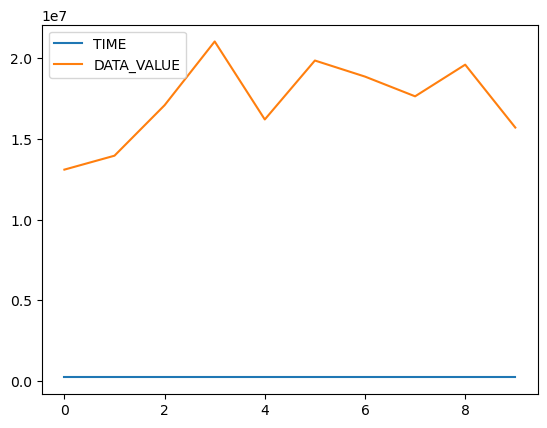

In [58]:
%matplotlib inline
import matplotlib as plt
import datetime as dt

stock_df = pd.DataFrame(stock_dict['StatisticSearch']['row'])
stock_df = stock_df[['TIME', 'DATA_VALUE']]
stock_df['TIME'] = stock_df['TIME'].astype(int)
stock_df['DATA_VALUE'] = stock_df['DATA_VALUE'].astype(int)

print(stock_df)
stock_df.plot()

In [ ]:
import pymysql.cursors
from sqlalchemy import create_engine as ce

engine = ce("mysql+pymysql://[root]:[Qkrrldud2021!]@[localhost]/[stock]?charset=utf8", encoding = 'utf-8')
# database 접속할 객체를 만듭니다
conn = engine.connect()

stock_df.to_sql(name="[stock_buy]", con=engine, if_exists='append', index=False)

conn.close()

In [27]:
import requests as rq

key = 'XYPOYKDP47WYCIRCVWP6'
stock_key = '901Y055'
stock_key_strings = ['S22AA', 'S22AB', 'S22AC', 'S22AD', 'S22BA', 'S22BB', 'S22BC']
for x in stock_key_strings:
    temp = rq.get(f'https://ecos.bok.or.kr/api/StatisticSearch/{key}/json/kr/1/10/{stock_key}/M/202001/202112/{x}/?/?/?')
    print(temp.status_code)
    temp_dict = temp.json()
    stock_full.append(temp_dict['StatisticSearch']['row'])

200
200
200
200
200
200
200


In [ ]:
import pandas as pd
stock_full_df = pd.DataFrame(stock_full)
print(stock_full_df)

Web Crawling vs Web Scraping
웹 사이트 데이터를 이해하고 웹 사이트 데이터를 수집하는데 사용하는 데이터 마이닝의 두 가지 개념인 웹크롤링과 스크래핑에 대해 알아보자.
웹 크롤러, 또는 웹 스파이다, 또는 크롤러라고 부르는 프로그램은 웹을 통해 콘텐츠 및 기타 데이터를 검색하고 자동으로 인덱싱한다. 이를 사용하면 불특정 URL과 도메인을 몰라도 데이터를 수집할 수 있다. 예를 들어 검색 엔진은 페이지를 색인화하고 검색 결과에 표시할 수 있도록 웹을 크롤링한다.
스크래핑은 인터넷에서 raw data를 수집하고 검사하는 절차이다. 이는 수동 또는 도구를 이용하여 자동으로 수행할 수 있다. 스크래핑을 위해선 최소한 도메인은 알고 있어야 한다(특정 웹사이트 대상이므로). 

크롤러는 url을 수집하여 각 특정 페이지의 모든 콘텐츠를 인덱싱한 후 인덱싱된 데이터를 데이터베이스에 저장한다. 스크래핑은 먼저 대상 웹사이트를 결정하고 html 파일을 요청하여 수신받고 이 문서에서 필요한 데이터를 추출한다.

크롤링으로는 웹페이지를 찾아서 인덱싱하고, 스크래핑은 그 페이지에서 데이터를 추출한다. 그러므로 일반적으로 이 두 가지를 모두 결합해야 웹에서 데이터를 효율적으로 추출할 수 있다.

HTML 문서를 받으려먼 URL을 수집해야 되는데 간단한 작업이 아니다. 구글과 같은 대형 검색엔진은 크롤링을 통해 수집한 페이지에 대한 인덱스를 생성할 때 '이용 약관' 같은 내용을 일일히 확인할 수 없다. 따라서 로봇 배제 표준 robots.txt 프로토콜이 생겨났다. 봇이 인덱싱을 시작하기 전에 웹 최상위에 존재하는 robots.txt 파일을 먼저 확인하고 그 안에 규정된 프로토콜을 따라 행동하게 된다. 경우에 따라서 파일 안에 Disallow: 가 없다면 다운로드 가능한 것으로 해석하기도 한다.

Reuter의 뉴스기사를 크롤링해보자. 먼저 robots.txt를 확인한다. https://www.reuters.com/robots.txt

robots_allow.txt for www.reuters.com
Disallow: /*/key-developments/article/*

User-agent: *
Disallow: /finance/stocks/option
Disallow: /finance/stocks/financialHighlights
Disallow: /search
Disallow: /site-search/
Disallow: /beta
Disallow: /designtech*
Disallow: /featured-optimize
Disallow: /energy-test
Disallow: /article/beta
Disallow: /sponsored/previewcampaign
Disallow: /sponsored/previewarticle
Disallow: /test/
Disallow: /commentary
Disallow: /news/archive/commentary
Disallow: /brandfeatures/venture-capital*
Disallow: /journalists/
Disallow: /assets/siteindex
Disallow: /article/api/

SITEMAP: https://www.reuters.com/arc/outboundfeeds/sitemap-index/?outputType=xml 
SITEMAP: https://www.reuters.com/arc/outboundfeeds/news-sitemap-index/?outputType=xml
SITEMAP: https://www.reuters.com/sitemap_video_index.xml
SITEMAP: https://www.reuters.com/brandfeature/sitemap

User-agent: Pipl
Disallow: /

이제 이를 분석해 보자. 아래 코드를 통해서 특정 user-agent가 특정 URL에 대해 접근 가능한지 체크해 볼 수 있다.

In [32]:
import urllib.robotparser as rbpsr
rp = rbpsr.RobotFileParser()
rp.set_url("https://reuters.com/robots.txt")
rp.read()

rp.can_fetch(useragent='*', url = 'https://reuters.com/sitemap.xml')

True

이제 sitemap도 활용해 보자.

In [45]:
sitemaps = rp.site_maps()
sitemaps

['https://www.reuters.com/arc/outboundfeeds/sitemap-index/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/news-sitemap-index/?outputType=xml',
 'https://www.reuters.com/sitemap_video_index.xml',
 'https://www.reuters.com/brandfeature/sitemap']

안에 loc 다음 나오는 링크들이 뉴스 기사임을 알 수 있다. 이제 xml parser를 활용해 보자.

In [59]:
import xmltodict as xtd
import requests as rq

sitemaps = rp.site_maps()
url = sitemaps[0]
sitemaps = xtd.parse(rq.get(url).text)
sitemaps['sitemapindex']['sitemap']
sitemap_urls = [sitemap['loc'] for sitemap in sitemaps['sitemapindex']['sitemap']]

['https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=200',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=300',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=400',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=500',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=600',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=700',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=800',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=900',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1000',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?output

위와 같이 sitemap URL만 추출할 수 있다. 여기서 news URL만 추출하면

In [68]:
response = rq.get(sitemap_urls[0])
news_dict = xtd.parse(response.text)
news_urls = [news['loc'] for news in news_dict['urlset']['url']]
news_urls[:5]

['https://www.reuters.com/world/europe/russian-offensive-eastern-ukraine-focused-bakhmut-2023-02-28/',
 'https://www.reuters.com/world/asia-pacific/rust-belt-province-got-old-before-it-got-rich-much-china-will-2023-02-28/',
 'https://www.reuters.com/business/saudis-sabic-posts-94-drop-q4-net-profit-lower-average-sales-prices-2023-02-28/',
 'https://www.reuters.com/business/retail-consumer/french-retailer-casinos-sales-growth-slows-fourth-quarter-2023-02-28/',
 'https://www.reuters.com/business/bayer-sees-lower-2023-operating-profit-cost-inflation-2023-02-28/']

In [69]:
%%time
#session 추상화
session = rq.Session()

#앞 5개의 링크만 가져온다.ㅠ
for url in news_urls[:5]:
    file = url.split('/')[-2] + '.html'
    response = session.get(url)
    if response.ok:
        with open("datas/"+file, "w+b") as f:
            f.write(response.text.encode("utf-8"))
    else:
        print(f"error with URL : {url}")

CPU times: user 104 ms, sys: 47.2 ms, total: 151 ms
Wall time: 5.04 s


In [70]:
with open('filename.txt', 'w') as f:
    f.write('파일에 작성할 문자열')

In [71]:
import os
path = './datas/'
files = [path + file for file in os.listdir(path)]
files

['./datas/rust-belt-province-got-old-before-it-got-rich-much-china-will-2023-02-28.html',
 './datas/bayer-sees-lower-2023-operating-profit-cost-inflation-2023-02-28.html',
 './datas/french-retailer-casinos-sales-growth-slows-fourth-quarter-2023-02-28.html',
 './datas/russian-offensive-eastern-ukraine-focused-bakhmut-2023-02-28.html',
 './datas/.ipynb_checkpoints',
 './datas/saudis-sabic-posts-94-drop-q4-net-profit-lower-average-sales-prices-2023-02-28.html']

In [72]:
with open(files[2], "r") as f:
    html = f.read()

beautifulsoup을 통해 HTML을 파싱할 수 있다.

In [77]:
from bs4 import BeautifulSoup as bsp
soup = bsp(html, 'html.parser')
title = soup.select_one('#main-content > article > div.article__main__33WV2 > div.article__content__6hMn9 > header > div > div > h1')
print(title.text)

French retailer Casino's sales growth slows in fourth quarter


In [78]:
soup.h1

<h1 class="text__text__1FZLe text__dark-grey__3Ml43 text__medium__1kbOh text__heading_3__1kDhc heading__base__2T28j heading__heading_3__3aL54 article-header__title__3Y2hh" data-testid="Heading">French retailer Casino's sales growth slows in fourth quarter</h1>

In [79]:
soup.h1.text

"French retailer Casino's sales growth slows in fourth quarter"

In [91]:
r = soup.select('div > p')

r = [x.text for x in r]
r

['PARIS, Feb 28 (Reuters) - French retailer Casino (CASP.PA) said group sales slowed in the fourth quarter of 2022, as a robust performance in Latin America was offset by weakness in the domestic market, where same-store sales at its Geant hypermarkets fell 6.2%.',
 'The company, which has been facing concerns over high debts and low cash flow, reports its full year earnings on March 10.',
 "Casino, which also controls Brazil's Grupo Pao de Acucar (PCAR3.SA), said group sales for the fourth quarter reached 9.155 billion euros ($9.7 billion), a 4.4% rise on a same store basis but a deceleration from 5.4% growth in the third quarter.",
 'In France alone, sales rose just 0.1% on a same store basis after rising 3.9% in the third quarter.',
 '($1 = 0.9447 euros)',
 'Our Standards: The Thomson Reuters Trust Principles.',
 "Oil prices were steady in Asian trade on Tuesday, supported by hopes a solid economic rebound in China will drive up fuel demand, offsetting worries about further U.S. int

<\link rel ="canonical"> 을 사용하면 표준 URL로 불러올 수 있다. 필수는 아니지만 검색 엔진에서도 확인하고 SEO에도 영항을 준다. 